# **Fundamentals of Data Science - Winter Semester 2023**


#### Prof. Fabio Galasso, Stefano D'Arrigo (TA), Edoardo De Matteis (TA), Daniele Trappolini (TA)
<galasso@di.uniroma1.it>, <darrigo@di.uniroma1.it> , <dematteis@di.uniroma1.it>, <daniele.trappolini@uniroma1.it>

## **#2 Homework: Classification**


-----------------------------------

*Note: your task is to fill in the missing code where you see `"YOUR CODE HERE"` and the text part `"WRITE YOUR TEXT HERE"` part corresponding to each subproblem and produce brief reports on the results whenever necessary.*

As part of the homework, provide the answer to questions in this notebook report-like manner. 

After you have implemented all the missing code in the required sections, you will be able to run all the code without any errors. 

We kindly ask you to double-check this since **all** the delivered homework will be executed.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.

-------------------------------------

**Submit it** by sending an email to:

**galasso@di.uniroma1.it** , **darrigo@di.uniroma1.it**, **dematteis@di.uniroma1.it**, and **daniele.trappolini@uniroma1.it** **by Wednesday, November 29th, 23:59**.

-------------------------------------

**Members of the team:**

- (Matricola: 2049495) Miguel A. Sanchez Cortes <sanchezcortes.2049495@studenti.uniroma1.it>

- (Matricola: 1912107) Pasquale Luca Tommasino <tommasino.1912107@studenti.uniroma1.it>

- (Matricola: 2130389) Sofia Noemi Crobeddu <sofianoemi.crobeddu@gmail.com>

- (Matricola: 1917002) Gabriele Volzone <volzone.1917002@studenti.uniroma1.it>

- (Matricola: 2125723) Laura Lopez Sanchez <laura.lopez@alum.esci.upf.edu>

-------------------------------------

**Outline and Scores for #2 Homework:**


* **Question 1: Logistic Resgression with Gradient Ascent** *(10 points)*
  * **Question 1.1: Log-likelihood and Gradient Ascent rule**
  * **Question 1.2: Implementation of Logistic Regression with Gradient Ascent**
  * **Question 1.3: Report**

* **Question 2: Logistic Regression with non linear boundaries** *(10 points)*
  * **Question 2.1: Polynomial features for logistic regression**
  * **Question 2.2: Plot the computed non-linear boundary**
  * **Question 2.3: Report**

* **Question 3: Multinomial Classification** *(10 points)*
  * **Question 3.1: Softmax Regression Model**
  * **Question 3.2: Coding**
  * **Question 3.3: Histogram Features Extraction**

* **BONUS Question 4: Transfer Learning on CIFAR-10** *(5 points)*
  * **Question 4.1: Train a KNN Classifier on CIFAR-10**
  * **Question 4.2: Train a Softmax Classifier on CIFAR-10**
  * **Question 4.3: Report**
  

**TOTAL POINTS ARE 35, BONUS QUESTION INCLUDED**

**Notation:**

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

**Let's start by setting up our Python environment and importing the required libraries:**

In [ ]:
if True:
    %pip install -qqq numpy scipy matplotlib pandas scikit-learn seaborn tqdm torch torchvision


In [1]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import os

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

#Here we ignore the FutureWarning error given by SeaBorn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



## **Question 1: Logistic Regression with Gradient Ascent *(10 Points)***

### **Question 1.1: Log-likelihood and Gradient Ascent Rule *(4/10 Points)*** 

Write the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation. 

#### **Solution:**
-------------------------------------------------------

- **Likelihood**: 
\begin{align}
L(\theta) = P(Y | X ; \Theta)\ =& \prod_{i = 1}^m P(y^{(i)} | x^{(i)} ; \theta)\nonumber \\
=& \boxed{\prod_{i = 1}^m \left(h_{\theta} (x^{(i)})\right)^{y^{(i)}} \left(1-h_{\theta} (x^{(i)})\right)^{1-y^{(i)}}}
\end{align}

- **Log-Likelihood**: 

\begin{align}
l(\theta) = \log L(\theta)=& \log\left(\prod_{i = 1}^m \left(h_{\theta} (x^{(i)})\right)^{y^{(i)}} \left(1-h_{\theta} (x^{(i)})\right)^{1-y^{(i)}} \right) \nonumber\\
=& \sum_{i = 1}^m \log\left(h_{\theta} (x^{(i)})\right)^{y^{(i)}} + \log \left(1-h_{\theta} (x^{(i)})\right)^{1-y^{(i)}} \nonumber\\
=& \boxed{\sum_{i = 1}^m y^{(i)}\log \left(h_{\theta} (x^{(i)})\right) + (1-y^{(i)}) \log \left(1-h_{\theta} (x^{(i)})\right)} \tag{2}
\end{align}

- **Gradient of log-likelihood**:

    To derive the gradient of log-likelihood first we can consider the derivative of the **sigmoid** function:

    \begin{align}
    \frac{\delta \sigma(x)}{\delta x} = \frac{\delta}{\delta x} \left(\frac{1}{1+e^{-x}}\right) =& \frac{e^{-x}}{(1+e^{-x})^{2}} = \frac{1-1 +e^{-x}}{(1+e^{-x})^{2}}\nonumber\\
    =& \frac{1+e^{-x}}{(1+e^{-x})^{2}} - \frac{1}{(1+e^{-x})^{2}} \nonumber\\
    =& \sigma(x) - \sigma(x)^{2} = \boxed{\sigma(x)(1-\sigma(x))} \tag{3}
    \end{align}
    
    Then, by the chain rule, and remembering that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$, we can obtain the gradient of the log-likelihood function as:

    \begin{align}
    \frac{\delta l(\theta)}{\delta \theta_{j}} =& \frac{\delta}{\delta \theta_{j}} \left(\sum_{i = 1}^m y^{(i)}\log \left(h_{\theta} (x^{(i)})\right) + (1-y^{(i)}) \log \left(1-h_{\theta} (x^{(i)})\right) \right) \nonumber\\
    =& \sum_{i = 1}^my^{(i)} \frac{1}{h_{\theta} (x^{(i)})} \cdot \left(h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))\right) \cdot \frac{\delta \theta^{T} x}{\delta \theta_{j}} \nonumber \\
    &+ \sum_{i = 1}^m (1-y^{(i)}) \frac{1}{1-h_{\theta} (x^{(i)})} \cdot \left(-h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))\right) \cdot \frac{\delta \theta^{T} x}{\delta \theta_{j}} \nonumber\\
    =& \sum_{i = 1}^my^{(i)}(1-h_\theta(x^{(i)})) \cdot x_{j}^{(i)} - (1-y^{(i)})h_\theta(x^{(i)})\cdot x_{j}^{(i)} \nonumber\\
    =& \boxed{\sum_{i = 1}^m ( y^{(i)} - h_{\theta}(x^{(i)})) x_j^{(i)}}
    \tag{4}
    \end{align}

- **Gradient update equation**: 
For  $j=0,...,n$:
\begin{equation}
\boxed{\theta_j = \theta_j + \alpha \sum_{i = 1}^m ( y^{(i)} - h_{\theta}(x^{(i)})) x^{(i)}_{j}}
\tag{5}
\end{equation}

-------------------------------------------------------

### **Question 1.2: Implementation of Logistic Regression with Gradient Ascent *(4/10 Points)***

Translate the equations you wrote above in code to learn the logistic regression parameters, $x^{(i)}_1$ and $x^{(i)}_2$ represent the two features for the $i$-th data sample $x^{(i)}$ and $y^{(i)}$ is its ground truth label.
The dataset used here is a customer service airline dataset, even if it is a toy dataset you will encounter some problems typical of real data.


**Do not write below this line just run it**

--------------------------------------------

In [2]:
# load data
df = pd.read_csv("data/Invistico_Airline.csv")
df.head()


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [3]:
print(df["satisfaction"].value_counts())
print("-" * 30)
print(df["Customer Type"].value_counts())
print("-" * 30)
print(df["Type of Travel"].value_counts())
print("-" * 30)
print(df["Class"].value_counts())


satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64
------------------------------
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
------------------------------
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64
------------------------------
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64


We can see how some values are not numerical, we first explore the data counting the number of unique values for each feature.
Then, we replace the categorical values with numerical ones.

In doing that, we also deal with null values, there are many ways to deal with null values, among which:
1. Replace with a default value. 
2. Replace them with the most frequent value for that feature.
3. Replace them with the mean or median value for that feature.

We opt for the mean value for each feature. 

In [4]:
# replace values with a number
df["satisfaction"] = df["satisfaction"].replace({"satisfied": 1, "dissatisfied": 0})
df["Customer Type"] = df["Customer Type"].replace(
    {"Loyal Customer": 1, "disloyal Customer": 0}
)
df["Type of Travel"] = df["Type of Travel"].replace(
    {"Business travel": 0, "Personal Travel": 1}
)
df["Class"] = df["Class"].replace({"Business": 0, "Eco": 1, "Eco Plus": 2})

# fill NaN values with mean
df["Arrival Delay in Minutes"].fillna(
    df["Arrival Delay in Minutes"].mean(), inplace=True
)
df.head()


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,65,1,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,1,47,1,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,1,15,1,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,1,60,1,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,1,70,1,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


It is advisable to look at the distribution of the data you will be dealing with.

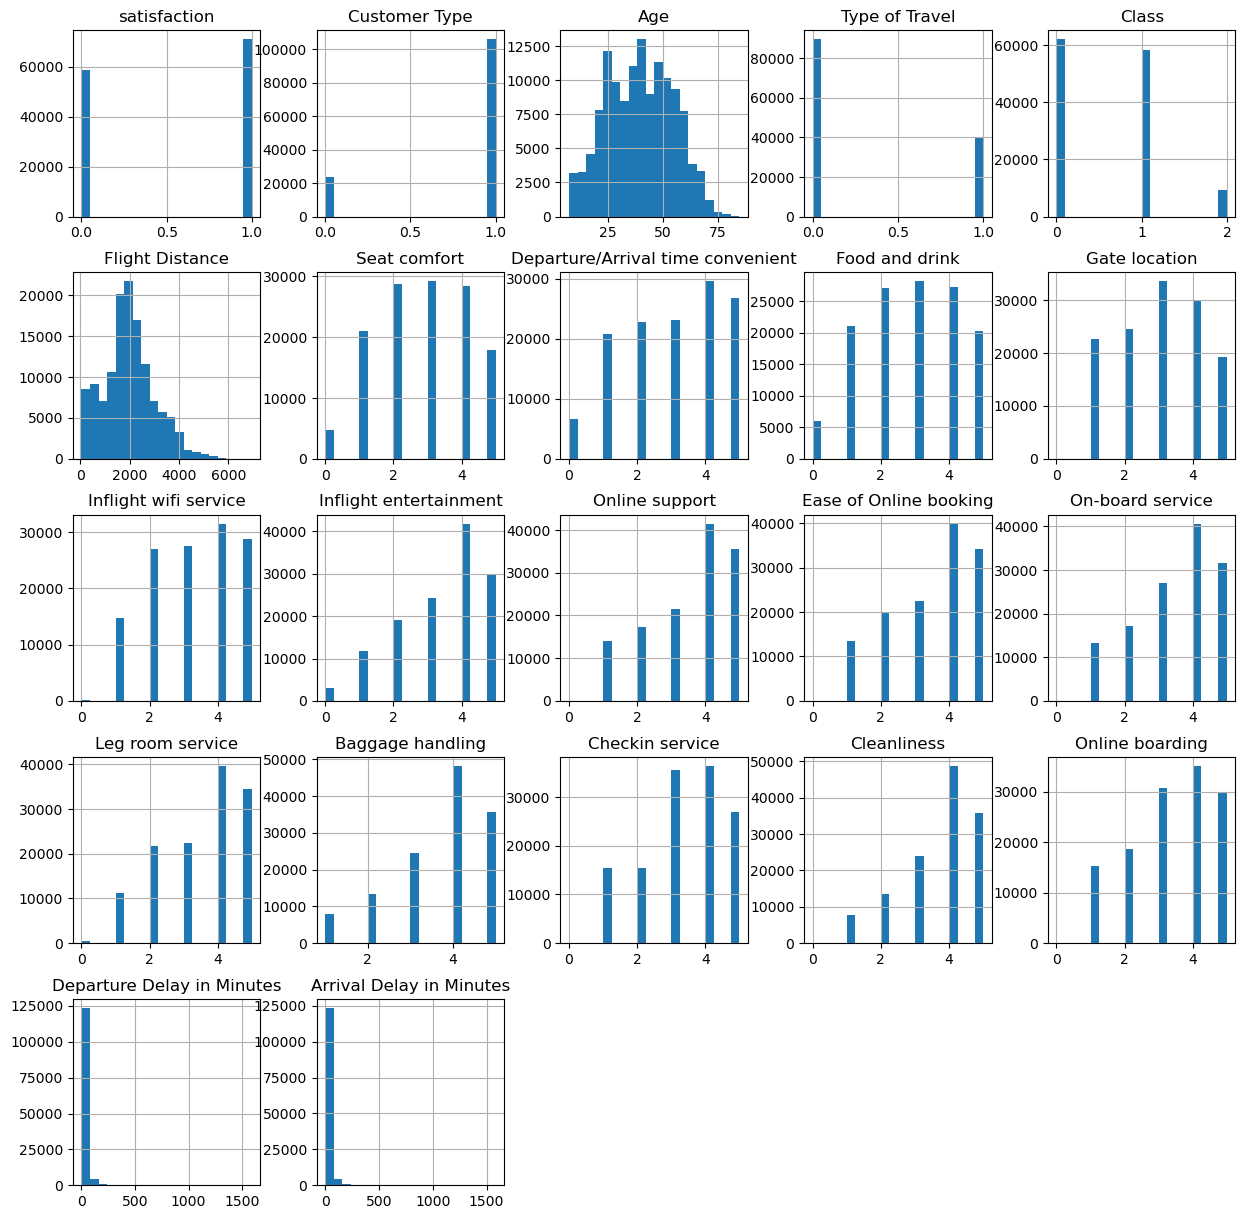

In [5]:
# Plot histograms for each variable
df.hist(figsize=(15, 15), bins=20)
plt.show()


In [6]:
df_small = df[["Flight Distance", "Leg room service", "satisfaction"]]
df_small.head()


,Flight Distance,Leg room service,satisfaction
0,265,0,1
1,2464,4,1
2,2138,3,1
3,623,0,1
4,354,0,1


Separate features from labels.

In [63]:
X, y = (df_small.drop(["satisfaction"], axis=1).values, df_small["satisfaction"].values)


It is recommended to normalize data when using gradient descent, we aim to have the data with mean $\mu=0$ and $\sigma=1$.

In [64]:
X = (X - X.mean()) / X.std()


<Axes: >

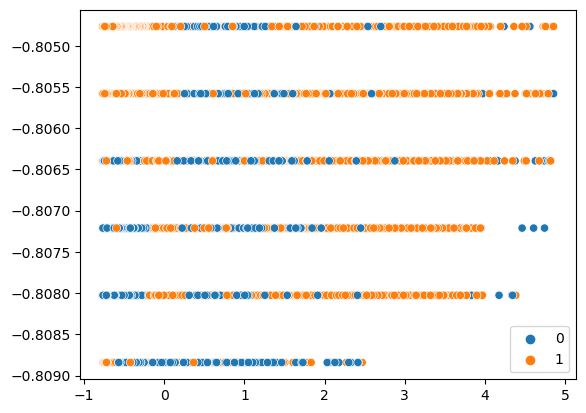

In [9]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)


We add a column of 1's to $X$ to take into account the zero intercept.

In [65]:
x = np.hstack([np.ones((X.shape[0], 1)), X])


Show the first and last 5 lines of $X$, now containing features $x_0$ (constant $1$), $x_1$ and $x_2$.

In [11]:
[
    x[:5, :],
    x[-5:, :],
]


[array([[ 1.        , -0.59286752, -0.80884172],
        [ 1.        ,  1.1993109 , -0.80558174],
        [ 1.        ,  0.93362188, -0.80639673],
        [ 1.        , -0.30109859, -0.80884172],
        [ 1.        , -0.52033278, -0.80884172]]),
 array([[ 1.        ,  0.60191809, -0.80639673],
        [ 1.        ,  0.89205703, -0.80639673],
        [ 1.        ,  1.08195133, -0.80639673],
        [ 1.        ,  1.18790094, -0.80721173],
        [ 1.        ,  2.70135038, -0.80476674]])]

Show the first and last 5 lines of y

In [12]:
[y[:5], y[-5:]]


[array([1, 1, 1, 1, 1]), array([1, 0, 0, 0, 0])]

Define the sigmoid function `sigmoid`, the function to compute the gradient of the log likelihood  `grad_l` and the gradient ascent algorithm.

*Hint: even though by definition log likelihood and gradient ascent are defined by summations, for numerical stability it is advised to use the mean operation.*


**Write your code below this line**

--------------------------------------------

In [13]:
def sigmoid(x):
    """
    Function to compute the sigmoid of a given input x.

    Args:
        x: it's the input data matrix.

    Returns:
        g: The sigmoid of the input x
    """
    #Here we compute the sigmoid of x by definition
    g = 1 / (1 + np.exp(-x))
    #Here we return the sigmoid of x
    return g


def log_likelihood(theta, x, y):
    """
    Function to compute the log likehood of theta according to data x and label y.

    Args:
        theta: it's the model parameter matrix.
        x: it's the input data matrix.
        y: the label array.

    Returns:
        log_l: the log likehood of theta according to data x and label y.
    """
    #First we compute the predictions of the input features
    h = predictions(x, theta)
    #Here we compute the log likelihood of theta according to data x and label y
    log_l = np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    #Here we return the log likelihood of theta according to data x and label y
    return log_l   


def predictions(features, theta):
    """
    Function to compute the predictions for the input features.

    Args:
        theta: it's the model parameter matrix.
        features: it's the input data matrix.

    Returns:
        preds: the predictions of the input features.
    """
    #The predictions are the sigmoid of the dot product of the features and the theta
    preds = sigmoid(np.matmul(features, theta))
    #Here we return the predictions of the input features
    return preds


def update_theta(theta, target, preds, feat, lr):
    """
    Function to compute the gradient of the log likelihood
    and then return the updated weights.

    Args:
        theta: the model parameter matrix.
        target: the label array.
        preds: the predictions of the input features.
        feat: it's the input data matrix.
        lr: the learning rate.

    Returns:
        theta: the updated model parameter matrix.
    """
    #Here we compute the gradient of the log likelihood
    gradient = np.mean((target - preds) * feat.T, axis=1)
    #Here we update the model parameter matrix
    theta += lr * gradient
    #Here we return the updated model parameter matrix
    return theta


def gradient_ascent(theta, feat, target, lr, num_steps):
    """
    Function to execute the gradient ascent algorithm.

    Args:
        theta: the model parameter matrix.
        target: the label array.
        num_steps: the number of iterations.
        feat: the input data matrix.
        lr: the learning rate.

    Returns:
        theta: the final model parameter matrix.
        log_likelihood_history: the values of the log likelihood during the process.
    """
    #First we initialize the log likelihood history
    log_likelihood_history = []
    #Here we iterate for the number of steps
    for _ in range(num_steps):
        #First we obtain the predictions of the input features
        preds = predictions(feat, theta)
        #Then we update the model parameter matrix
        theta = update_theta(theta, target, preds, feat, lr)
        #Here we append the log likelihood to the log likelihood history
        log_likelihood_history.append(log_likelihood(theta, feat, target))
    #Here we return the final model parameter matrix and the log likelihood history
    return theta, log_likelihood_history



**Do not write below this line just run it**

--------------------------------------------

**Check your grad_l implementation:**

`grad_l` applied to the `theta_test` (defined below) should provide a value for `log_l_test` close to the `target_value` (defined below).
In other words, `error_test` should be 0, up to machine error precision.

In [14]:
target_value = -1.1404441213525176
output_test = log_likelihood(np.array([-1, 0, 1]), x, y)
error_test = np.abs(output_test - target_value)
print("Error: ", error_test)


Error:  0.0


**Synthetic dataset**

Let's first test our implementation on a synthetic dataset.

In [15]:
X_, y_ = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=1,
)
x_ = np.hstack([np.ones((X_.shape[0], 1)), X_])
x_.shape, y_.shape


((500, 3), (500,))

<Axes: >

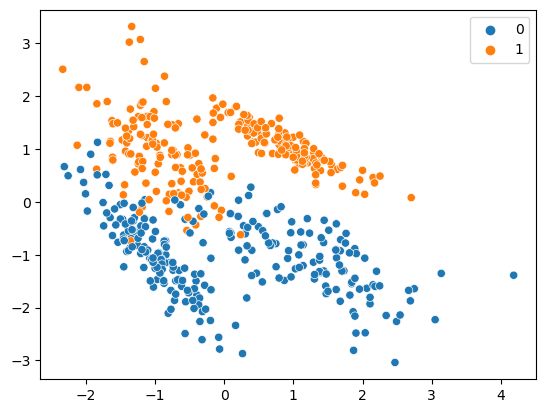

In [16]:
sns.scatterplot(x=X_[:, 0], y=X_[:, 1], hue=y_)


In [17]:
# Initialize theta0
theta0 = np.random.normal(0, 0.01, x_.shape[1])

# Run Gradient Ascent method
n_iter = 50
theta_final, log_l_history = gradient_ascent(theta0, x_, y_, lr=0.5, num_steps=n_iter)


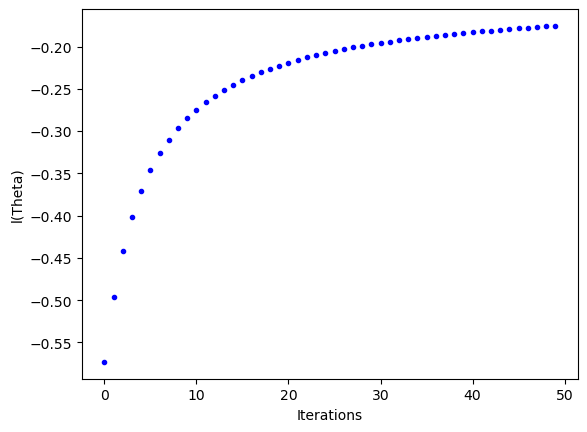

In [18]:
fig, ax = plt.subplots(num=2)

ax.set_ylabel("l(Theta)")
ax.set_xlabel("Iterations")
_ = ax.plot(range(len(log_l_history)), log_l_history, "b.")


Let's plot the data and the decision boundary, you should see a line separating the two classes.

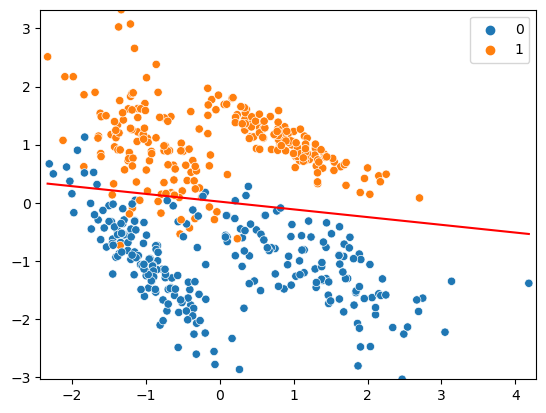

In [19]:
# Plot raw data
sns.scatterplot(x=X_[:, 0], y=X_[:, 1], hue=y_)

# # Define range of x values
x_range = np.array([np.min(X_[:, 0]), np.max(X_[:, 0])])
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")
# set the limits of the plot to the limits of the data
plt.xlim(np.min(X_[:, 0]) - 0.1, np.max(X_[:, 0] + 0.1))
plt.ylim(np.min(X_[:, 1]) - 0.001, np.max(X_[:, 1] + 0.001))
pass


**Real dataset**

Now we come back to the real dataset, we will see how things get harder in the real world.

We sample our $\theta_0$ from $\mathcal{N}(0,1e-2)$.

Let's apply the function gradient_ascent and print the final theta as well as theta_history:

In [20]:
# Initialize theta0
theta0 = np.random.normal(0, 0.01, x.shape[1])

# Run Gradient Ascent method
n_iter = 50
theta_final, log_l_history = gradient_ascent(theta0, x, y, lr=0.5, num_steps=n_iter)


Let's plot the log likelihood over different iterations:


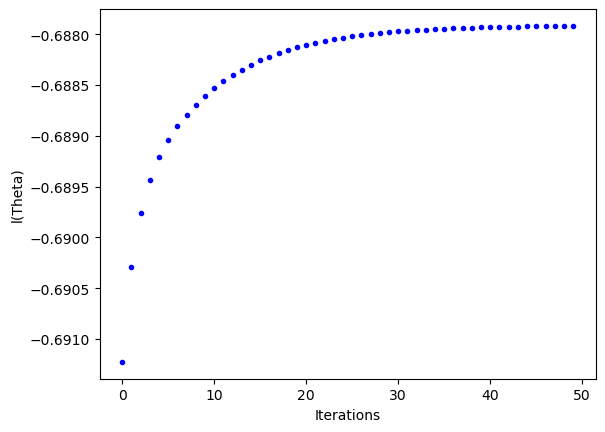

In [21]:
fig, ax = plt.subplots(num=2)

ax.set_ylabel("l(Theta)")
ax.set_xlabel("Iterations")
_ = ax.plot(range(len(log_l_history)), log_l_history, "b.")


Plot the data and the decision boundary:

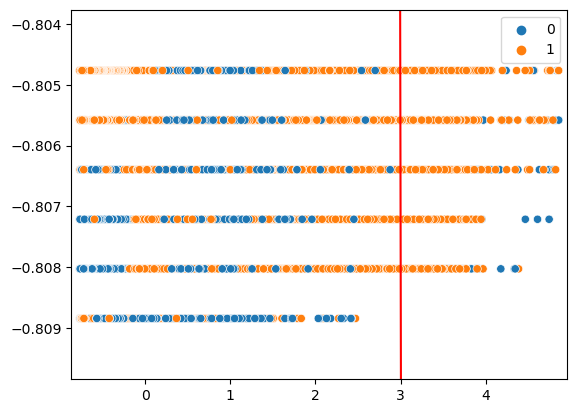

In [22]:
# Plot raw data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# # Define range of x values
x_range = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")
# set the limits of the plot to the limits of the data
plt.xlim(np.min(X[:, 0]) - 0.1, np.max(X[:, 0] + 0.1))
plt.ylim(np.min(X[:, 1]) - 0.001, np.max(X[:, 1] + 0.001))
pass


### **Question 1.3: Report *(2/10 Points)***

1. Are we looking for a local minimum or a local maximum using the gradient ascent rule? 

2. You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?

3. Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results?

4. What happens if you do not normalize the data? Try to run the algorithm without normalizing the data and see what happens. Why do you think this happens?

5. We have choosen two features to train our model, but it does not mean that those are the best features to use. Try to use different features, at least two other pairs, and see if you can get a better or worse decision boundary, commenting the results you get.

#### **Report:**
-------------------------------------------------------

1. The **Gradient Ascent** rule is used to find a local maximum of a function, in this case, of the log-likelihood function. By observing at equation $(5)$, we can see that Gradient Ascent involves iteratively adjusting the weights in the direction of the gradient of the function with respect to those weights. By iteratively applying this update rule, we move towards a local maximum of the log-likelihood function.

2. Yes, we could've. Both **Gradient Ascent** and **Gradient Descent** can be used for logistic regression, and the choice between them depends only whether we formulate the problem as a maximization or minimization task.

    Maximizing the likelihood is equivalent to minimizing the negative log likelihood. Therefore, the logistic regression problem can be framed as a minimization problem, and gradient descent is commonly used to find the minimum of the logistic loss function.


3. We can implement the same algorithm as before by analyzing two different cases: fixing $N$ and changing $\alpha$ or viceversa. Let's see what we obtain if we try different values for $N$ (with $\alpha$ fixed):

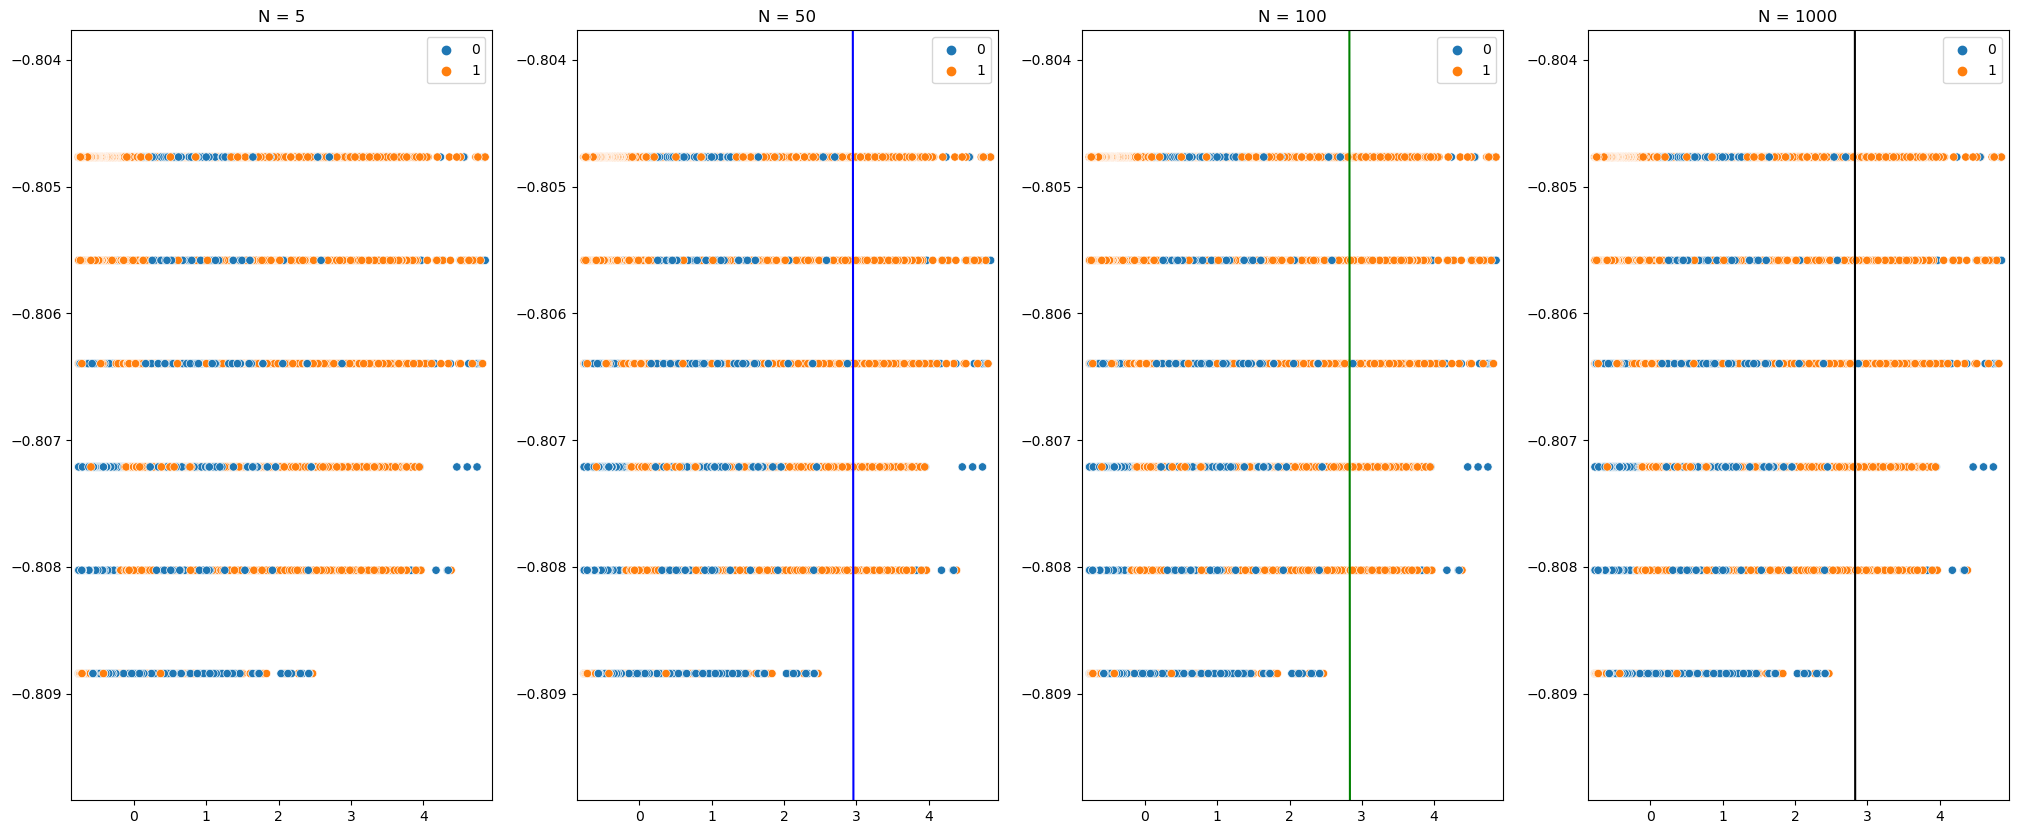

In [67]:
#Here we initialize the plot subfigures, we will have 4 plots
fig, ax = plt.subplots(1, 4, figsize=(25, 10))

# Here we initialize theta0
theta0 = np.random.normal(0, 0.01, x.shape[1])

#We also define a list of colors to plot the decision boundary for each N
colors = ["red", "blue", "green", "black", "orange"]

# Here we run the Gradient Ascent method for a list of iterations fixing the learning rate
iterations = [5, 50, 100, 1000]
for i, n_iter in enumerate(iterations):
    theta_final, log_l_history = gradient_ascent(theta0, x, y, lr=0.5, num_steps=n_iter)
    # Here we plot the raw data
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax[i])
    # set the limits of the plot to the limits of the data
    ax[i].set_xlim(np.min(X[:, 0]) - 0.1, np.max(X[:, 0] + 0.1))
    ax[i].set_ylim(np.min(X[:, 1]) - 0.001, np.max(X[:, 1] + 0.001))
    x_range = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
    # Here we plot the decision boundary
    ax[i].plot(x_range, y_range, c=colors[i])
    ax[i].set_title("N = " + str(n_iter))
pass


We know that the number of iterations $N$ determines how many times the learning algorithm will work through our entire dataset. Each iteration involves updating the model parameters based on the gradient of the cost function with respect to these parameters. From our plot we can one thing:

> A very small value of $N$ the model might not converge to the optimal solution. Therefore the decision boundary might not accurately capture the underlying patterns in the data (as we can see on the first plot, where the decision boundary is not within the range of our data values).

In theory, if the number of iterations is too high, the model may overfit and this would lead to poor generalization on new data. In this case we only tested for $N=1000$ in order to keep running times short.

On the other case, fixing $N$ and changing values for $\alpha$:

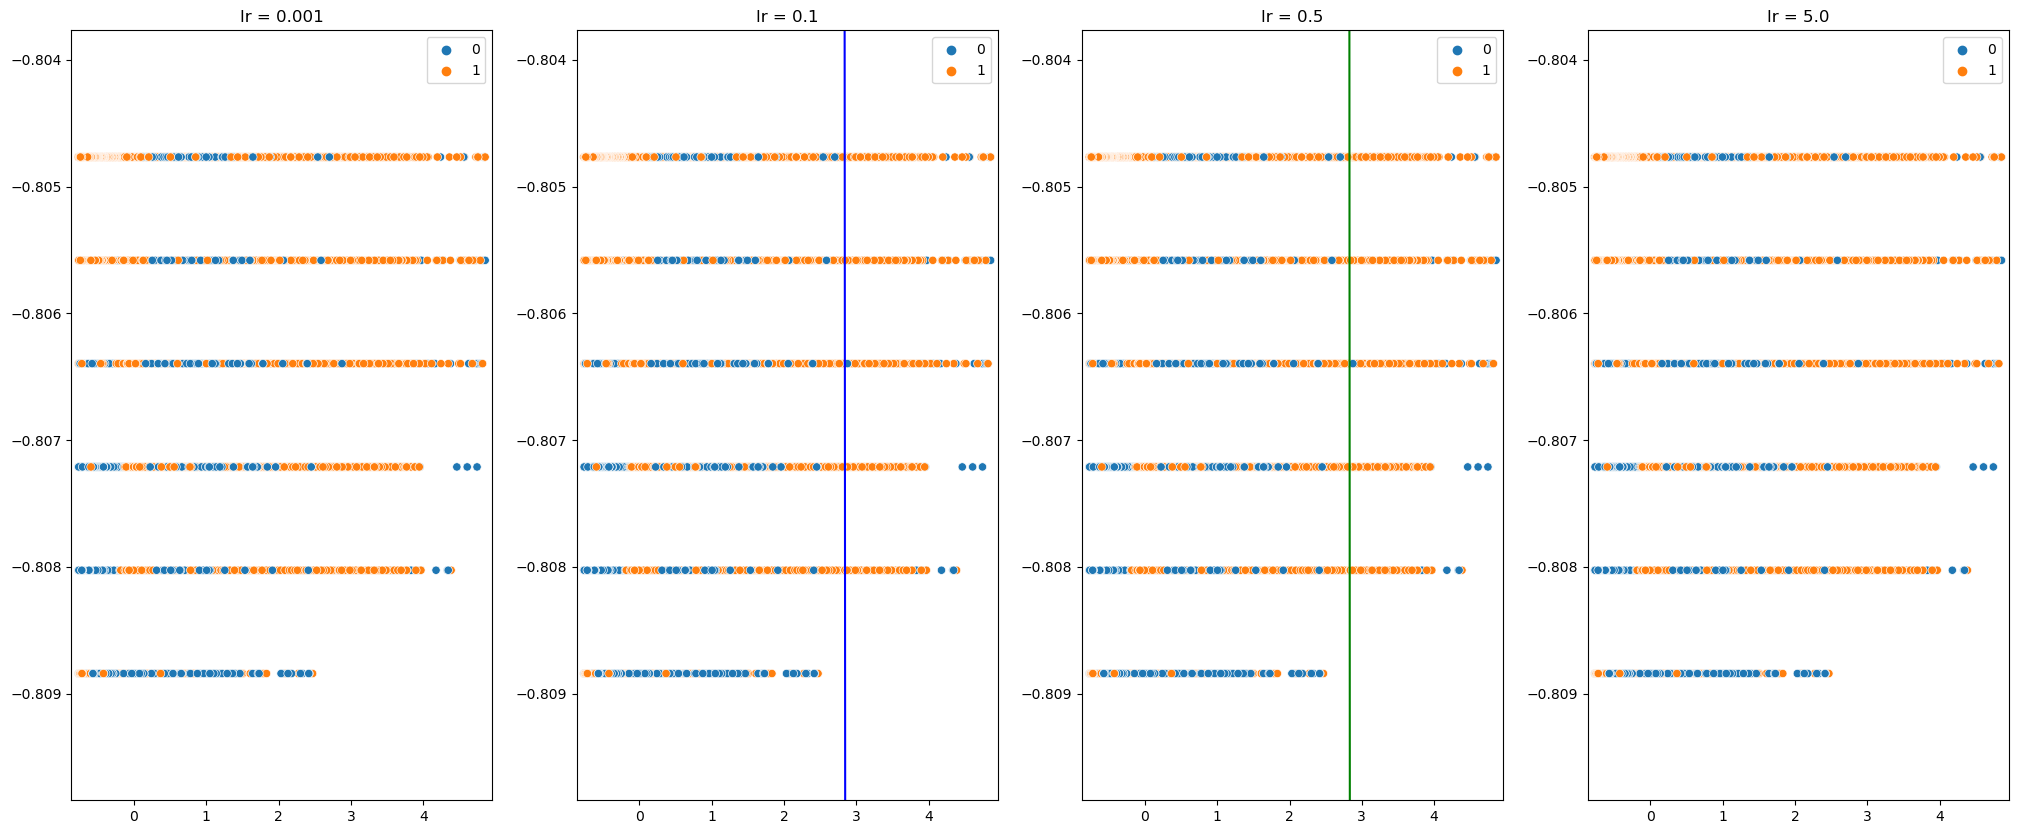

In [66]:
#Here we initialize the plot subfigures, we will have 4 plots
fig, ax = plt.subplots(1, 4, figsize=(25, 10))

# Here we initialize theta0
theta0 = np.random.normal(0, 0.01, x.shape[1])

#We also define a list of colors to plot the decision boundary for each N
colors = ["red", "blue", "green", "black", "orange"]

# Here we run the Gradient Ascent method for a list of learning rates fixing the number of iterations
learning_rates = [0.001, 0.1, 0.5, 5.0]
for i, lr in enumerate(learning_rates):
    theta_final, log_l_history = gradient_ascent(theta0, x, y, lr=lr, num_steps=500)
    # Here we plot the raw data
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax[i])
    # set the limits of the plot to the limits of the data
    ax[i].set_xlim(np.min(X[:, 0]) - 0.1, np.max(X[:, 0] + 0.1))
    ax[i].set_ylim(np.min(X[:, 1]) - 0.001, np.max(X[:, 1] + 0.001))
    x_range = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
    # Here we plot the decision boundary
    ax[i].plot(x_range, y_range, c=colors[i])
    ax[i].set_title("lr = " + str(lr))
pass


We know that the learning rate $\alpha$ controls the step size during the optimization process. It determines how much the model parameters should be updated in the direction of the gradient of the cost function. From our plot we can see two things:

> A very small $\alpha$ might cause slow convergence, and the model might get stuck in a suboptimal solution (a suboptimal maximum in this case) or take a long time to reach convergence. We can see this happened for $\alpha=0.001$ since the decision boundary is not within the range of our data values.

> A very high $\alpha$ might cause the model to overshoot the maximum of the cost function, leading to oscillations or divergence (never finding a local maximum, in other words). We can see this happened for $\alpha=5$ since the decision boundary is not within the range of our data values.

4. If we try to run our algorithm without normalizing the data we obtain the following:

In [68]:
#We obtain our data first
X, y = (df_small.drop(["satisfaction"], axis=1).values, df_small["satisfaction"].values)

#Without normalizing we add a column of ones to the data to take into account the zero intercept
x = np.hstack([np.ones((X.shape[0], 1)), X])

# Initialize theta0
theta0 = np.random.normal(0, 0.01, x.shape[1])

# Run Gradient Ascent method
n_iter = 50
theta_final, log_l_history = gradient_ascent(theta0, x, y, lr=0.5, num_steps=n_iter)


/var/folders/62/cfhdj0z55fs5ndwkp4p1dyl80000gn/T/ipykernel_99356/723435820.py:32: RuntimeWarning: divide by zero encountered in log
  log_l = np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
/var/folders/62/cfhdj0z55fs5ndwkp4p1dyl80000gn/T/ipykernel_99356/723435820.py:32: RuntimeWarning: invalid value encountered in multiply
  log_l = np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
/var/folders/62/cfhdj0z55fs5ndwkp4p1dyl80000gn/T/ipykernel_99356/723435820.py:12: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))


If we plot the log-loss history we could see there aren't values on the plot. We also can see we obtained two special warnings:

> Divide by zero encountered in log.

> Overflow encountered in exp.

Not normalizing data can lead to large differences between feature values can result in numerical instability when training. Specifically: 

> The logistic regression model involves calculating exponentials, Exponentiating large or extremely negative values can lead to overflow (very large numbers) or underflow (very small numbers), depending on the precision used by the computer.

This would also lead to problems when calculating logarithm since we could enter regions where this function is not defined leading to errors and possible None values when making calculations.

5. We can run our algorithm for the following pair of features we think are important when flying and can influence clients a lot:

    * Departure/Arrival time convenient & Inflight Wi-Fi service.

    * Departure Delay in Minutes & Age

    For the first option we have:

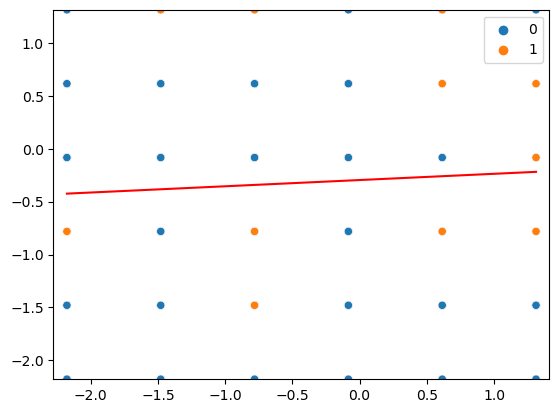

In [73]:
#Here we obtain new features
df_small = df[["Departure/Arrival time convenient", "Inflight wifi service", "satisfaction"]]

#We obtain our data first
X, y = (df_small.drop(["satisfaction"], axis=1).values, df_small["satisfaction"].values)

#Here we normalize
X = (X - X.mean()) / X.std()

#We add a column of ones to the data to take into account the zero intercept
x = np.hstack([np.ones((X.shape[0], 1)), X])

# Initialize theta0
theta0 = np.random.normal(0, 0.01, x.shape[1])

# Run Gradient Ascent method
n_iter = 50
theta_final, log_l_history = gradient_ascent(theta0, x, y, lr=0.5, num_steps=n_iter)

#Finally we plot the decision boundary
# Plot raw data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# # Define range of x values
x_range = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")
# set the limits of the plot to the limits of the data
plt.xlim(np.min(X[:, 0]) - 0.1, np.max(X[:, 0] + 0.1))
plt.ylim(np.min(X[:, 1]) - 0.001, np.max(X[:, 1] + 0.001))
pass


We can say that we didn't obtain a better decision boundary since there is not a clear division of our satisfied clients and not satisfied clients. Maybe these features are not as important to classify customers. Let's try with the other pair:

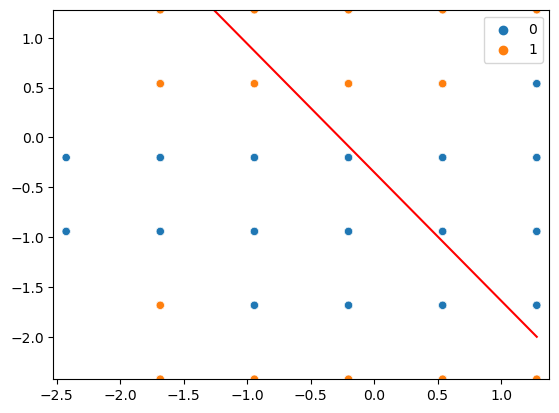

In [81]:
#Here we obtain new features
df_small = df[["Departure Delay in Minutes", "Age", "satisfaction"]]

#We obtain our data first
X, y = (df_small.drop(["satisfaction"], axis=1).values, df_small["satisfaction"].values)

#Here we normalize
X = (X - X.mean()) / X.std()

#We add a column of ones to the data to take into account the zero intercept
x = np.hstack([np.ones((X.shape[0], 1)), X])

# Initialize theta0
theta0 = np.random.normal(0, 0.01, x.shape[1])

# Run Gradient Ascent method
n_iter = 50
theta_final, log_l_history = gradient_ascent(theta0, x, y, lr=0.5, num_steps=n_iter)

#Finally we plot the decision boundary
# Plot raw data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# # Define range of x values
x_range = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")
# set the limits of the plot to the limits of the data
plt.xlim(np.min(X[:, 0]) - 0.1, np.max(X[:, 0] + 0.1))
plt.ylim(np.min(X[:, 1]) - 0.001, np.max(X[:, 1] + 0.001))
pass


This also wasn't a very wise choice. We can see that is not a trivial task to choose the best features to perform our classification and given the different nature of the features in our dataset maybe it would be best to do an analysis to find the best features but this is outside of the scope of the homework.

## **Question 2: Logistic Regression with non linear boundaries *(10 points)***

### **Question 2.1: Polynomial features for logistic regression *(4/10 Points)*** 

Define new features e.g., of $2$-nd and $3$-rd degree, and learn a logistic regression classifier by using the new features and the gradient ascent optimization algorithm defined in Question 1.

In particular, consider a polynomial boundary with equation:

\begin{equation}
f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2
\end{equation}

Therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking $x$ and the new 7 features (in the order $x_1x_1, x_2x_2, x_1x_2, x_1x_1x_1, x_2x_2x_2, x_1x_1x_2, x_1x_2x_2$). 
In particular create `x_new_quad` by additionally stacking $x$ with the quadratic features, and `x_new_cubic` by additionally stacking $x$ with the quadratic and the cubic features.

**Do not write below this line just run it**

--------------------------------------------

In [82]:
X, y = make_classification(
    n_samples=700,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=5,
)
X, X_test, y, y_test = train_test_split(X, y, test_size=200, random_state=42)

X.shape, y.shape


((500, 2), (500,))

In [83]:
x = np.hstack([np.ones((X.shape[0], 1)), X])
x_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


<Axes: >

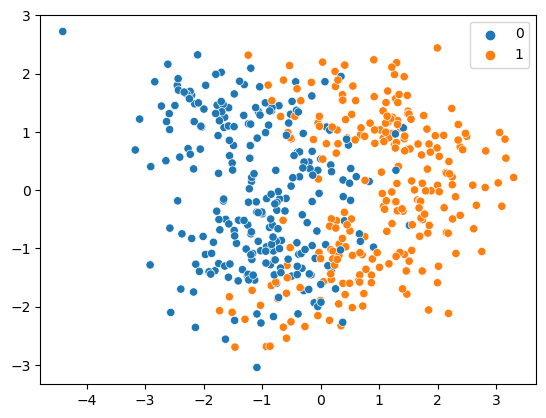

In [84]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)


In [85]:
# First extract features x1 and x2 from x and reshape them to x1 vector arrays
x1 = x[:, 1]
x2 = x[:, 2]
x1 = x1.reshape(x1.shape[0], 1)
x2 = x2.reshape(x2.shape[0], 1)
print(f"x:\n{x[:5, :]}\n{'-'*40}")  # For visualization of the first 5 values
print(f"x1:\n{x1[:5, :]}\n{'-'*40}")  # For visualization of the first 5 values
print(f"x2:\n{x2[:5, :]}")  # For visualization of the first 5 values


x:
[[ 1.          0.03442384  2.19638976]
 [ 1.         -2.40887036  0.56635599]
 [ 1.         -2.5819359   1.03896962]
 [ 1.          1.99924792 -1.5903458 ]
 [ 1.         -0.91810318 -0.14326978]]
----------------------------------------
x1:
[[ 0.03442384]
 [-2.40887036]
 [-2.5819359 ]
 [ 1.99924792]
 [-0.91810318]]
----------------------------------------
x2:
[[ 2.19638976]
 [ 0.56635599]
 [ 1.03896962]
 [-1.5903458 ]
 [-0.14326978]]


**Write your code below this line**

--------------------------------------------

In [90]:
def get_polynomial(X, degree):
    """
    Given an initial set of features, this function computes the polynomial features up to the given degree.

    Args:
        X: the initial features
        degree: the degree of the polynomial

    Returns:
        X: the final polynomial features
    """
    #If the degree is less than 2 we return the initial features
    if degree < 2:
        return X
    
    #In case the degree is greater than 2 we compute the polynomial features for each degree
    #First we initialize the polynomial features with the initial features
    features = np.ones(X[:, 1].shape[0])
    x1 = X[:, 1]
    x2 = X[:, 2]
    #Here we compute the polynomial features for each degree below since they are particular cases
    poly_features = [x1, x2, x1**2, x2**2, x1*x2]

    #If the degree is bigger than 2 we compute the polynomial features for each degree
    if degree > 2:
        for d in range(3, degree + 1):
            #Here we compute the polynomial features for each degree and extend the list of polynomial features
            poly_features.extend([x1**d, x2**d, (x1**(d-1))*x2, x1*(x2**(d-1))])

    #Here we stack the polynomial features
    features = np.stack([features, *poly_features], axis=1)

    #Here we return the final polynomial features
    return features



**Do not write below this line just run it**

--------------------------------------------

In [91]:
x_new_quad = get_polynomial(x, degree=2)
x_new_cubic = get_polynomial(x, degree=3)
print(x_new_quad.shape, x_new_cubic.shape)


(500, 6) (500, 10)


Now use the gradient ascent optimization algorithm to learn theta by maximizing the log-likelihood, both for the case of x_new_quad and x_new_cubic.

In [92]:
# Initialize theta0, in case of quadratic features
theta0_quad = np.zeros(x_new_quad.shape[1])

theta_final_quad, log_l_history_quad = gradient_ascent(
    theta0_quad, x_new_quad, y, lr=0.5, num_steps=n_iter
)

# Initialize theta0, in case of quadratic and cubic features
theta0_cubic = np.zeros(x_new_cubic.shape[1])

# Run Newton's method, in case of quadratic and cubic features
theta_final_cubic, log_l_history_cubic = gradient_ascent(
    theta0_cubic, x_new_cubic, y, lr=0.5, num_steps=n_iter
)

# check and compare with previous results
print(theta_final_quad)
print(theta_final_cubic)


[-0.43978581  1.99723372  0.11087099 -0.04025729  0.43849441  0.1660294 ]
[-0.55060145  0.82985382  0.17380083 -0.06126948  0.51224138  0.09479032
  0.85995142  0.06307569 -0.45655109  0.03263208]


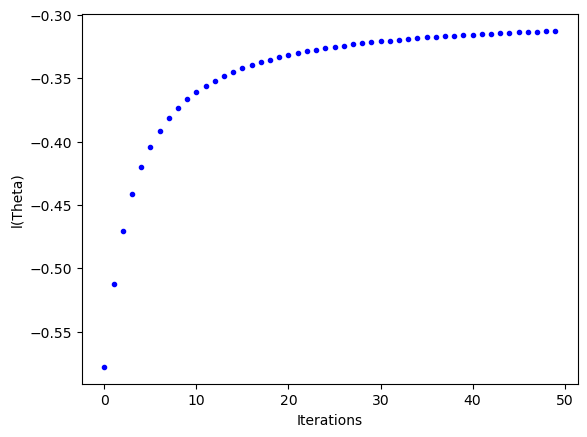

In [93]:
# Plot the log likelihood values in the optimization iterations, in one of the two cases.
fig, ax = plt.subplots(num=2)

ax.set_ylabel("l(Theta)")
ax.set_xlabel("Iterations")
_ = ax.plot(range(len(log_l_history_quad)), log_l_history_quad, "b.")


### **Question 2.2: Plot the computed non-linear boundary *(4/10 Points)*** 



First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 2.

**Write your code below this line**

--------------------------------------------

In [94]:
def boundary_function(x1_vec, x2_vec, theta_final, degree):
    """
    This function computes the boundary function for the given theta_final and degree.

    Args:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        theta_final: the final theta
        degree: the degree of the polynomial

    Returns:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        f: the boundary function
    """

    #First we perform a meshgrid to obtain the x1 and x2 vectors
    x1_vec, x2_vec = np.meshgrid(x1_vec, x2_vec)
    
    #Here we initialize the boundary function with the intercept
    f = theta_final[0]

    #We will check three cases: degree 1, degree 2 and degree above 2
    #For each case we will add the corresponding terms to the boundary function
    if degree == 1:
        #Here we add the linear terms
        f += theta_final[1] * x1_vec + theta_final[2] * x2_vec
    elif degree == 2:
        #Here we add the linear terms and the quadratic terms
        f += theta_final[1] * x1_vec + theta_final[2] * x2_vec
        f += theta_final[3] * x1_vec**2 + theta_final[4] * x2_vec**2 + theta_final[5] * x1_vec * x2_vec
    else:
        #Here we add the linear terms and the quadratic terms
        f += theta_final[1] * x1_vec + theta_final[2] * x2_vec
        f += theta_final[3] * x1_vec**2 + theta_final[4] * x2_vec**2 + theta_final[5] * x1_vec * x2_vec
        #Here we add the cubic terms and extra terms for each degree above 3
        for d in range(3, degree + 1):
            index = 5 + 4*(d-3)
            f += theta_final[index+1] * x1_vec**d + theta_final[index+2] * x2_vec**d + theta_final[index+3] *(x1_vec**(d-1))*x2_vec + theta_final[index+4] * x1_vec*(x2_vec**(d-1))

    #Here we return the x1 vector, the x2 vector and the boundary function
    return x1_vec, x2_vec, f



**Do not write below this line just run it**

--------------------------------------------

Now plot the decision boundaries corresponding to the `theta_final_quad` and `theta_final_cubic` solutions.

In [95]:
#NOTE: WE COMMENTED THE MESH_SHAPE AND RESHAPE FUNCTIONS BECAUSE THEY ARE NOT NECESSARY FOR THE PLOTS
#THIS IS SINCE WE ARE USING THE MESHGRID FUNCTION BEFORE
def plot_boundary_function(
    X: np.ndarray, y: np.ndarray, theta: np.ndarray, degree: int, n_points: int = 200
) -> None:
    """
    This function plots the boundary function for the given theta and degree.

    Args:
        X: the input data
        y: the input labels
        theta: the final theta
        degree: the degree of the polynomial
        n_points: the number of points to plot

    Returns:
        None
    """

    x1_vec = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, n_points)
    x2_vec = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, n_points)

    x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta, degree=degree)
    #mesh_shape = int(np.sqrt(f.shape[0]))

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
    plt.contour(
        x1_vec, x2_vec, f, colors="red", levels=[0]
    )#f.reshape((mesh_shape, mesh_shape))
    plt.show()


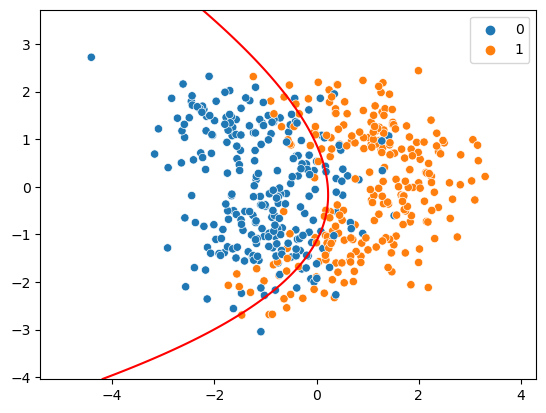

In [96]:
plot_boundary_function(X, y, theta_final_quad, degree=2)


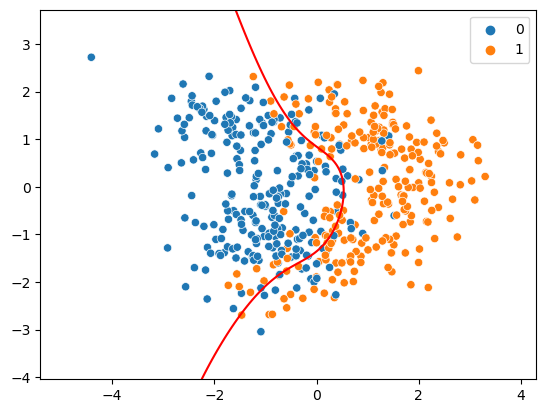

In [97]:
plot_boundary_function(X, y, theta_final_cubic, degree=3)


**Polynomial degree and overfitting**

As the polynomial degree increases, the decision boundary becomes more and more complex. This can lead to overfitting, i.e. the model learns the training data too well, and it is not able to generalize to new data. This is a common problem in machine learning, and it is important to be able to detect it.

In order to detect overfitting, we can split the dataset into a training set and a test set. The training set is used to learn the model, while the test set is used to evaluate the model performance on new data. If the model performs well on the training set, but it performs poorly on the test set, then we have overfitting.

In this exercise, you are asked to plot the training and test accuracy as a function of the polynomial degree. Consider all the polynomial degrees from 1 to 20. For each polynomial degree, learn the model on the training set, and evaluate the accuracy on both the training and the test set. Additionally, visualize the decision boundary for the polynomials that give the **best** and the **worst** test accuracy.

In [98]:
def fit_polynomial(X, y, degree, lr, num_steps):
    """
    Given an initial set of features, this function computes the polynomial features up to the given degree.

    Args:
        X: the initial features
        y: the target values
        degree: the degree of the polynomial
        lr: the learning rate
        num_steps: the number of iterations

    Returns:
        theta_final: the final model parameter matrix
        log_l_history: the values of the log likelihood during the process
    """

    x_new = get_polynomial(X, degree=degree)

    # Initialize theta0
    theta0 = np.zeros(x_new.shape[1])

    # Run Gradient Ascent method
    theta_final, _ = gradient_ascent(theta0, x_new, y, lr=lr, num_steps=num_steps)

    return theta_final, x_new


def predict(x, theta):
    z = np.dot(x, theta)
    probabilities = sigmoid(z)
    y_hat = np.array(list(map(lambda x: 1 if x > 0.5 else 0, probabilities)))
    return y_hat


def fit_polynomials(X, y, X_test, y_test, degrees, lr, num_steps):
    """
    This function fits a logistic regression model for each degree in the degrees list.
    """
    X = normalize(X)
    X_test = normalize(X_test)

    thetas = []
    accuracy_scores_train, accuracy_scores_test = [], []
    for degree in tqdm(degrees):
        theta, x_new = fit_polynomial(X, y, degree, lr, num_steps)
        thetas += [theta]
        y_hat_train = predict(x_new, theta)
        accuracy_scores_train += [accuracy_score(y, y_hat_train)]
        y_hat_test = predict(get_polynomial(X_test, degree=degree), theta)
        accuracy_scores_test += [accuracy_score(y_test, y_hat_test)]

    return thetas, accuracy_scores_train, accuracy_scores_test


In [99]:
degrees = np.arange(1, 21)
thetas, accuracy_scores_train, accuracy_scores_test = fit_polynomials(
    x, y, x_test, y_test, degrees=degrees, lr=0.5, num_steps=1000
)


100%|██████████| 20/20 [00:02<00:00,  8.15it/s]


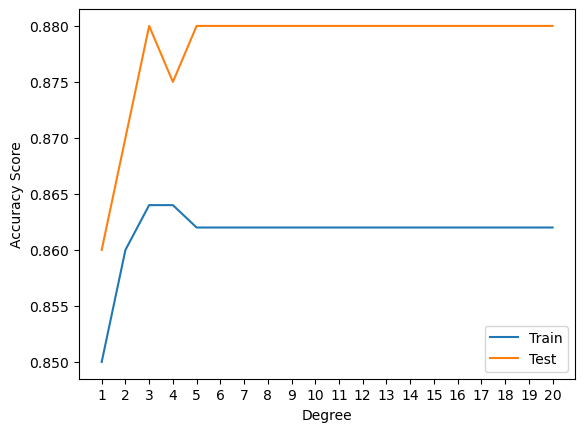

In [100]:
sns.lineplot(x=degrees, y=accuracy_scores_train, label="Train")
sns.lineplot(x=degrees, y=accuracy_scores_test, label="Test")
plt.xlabel("Degree")
plt.ylabel("Accuracy Score")
plt.xticks(degrees)
plt.show()


**Write your code below this line**

--------------------------------------------

Plot the best and the worst decision boundaries.

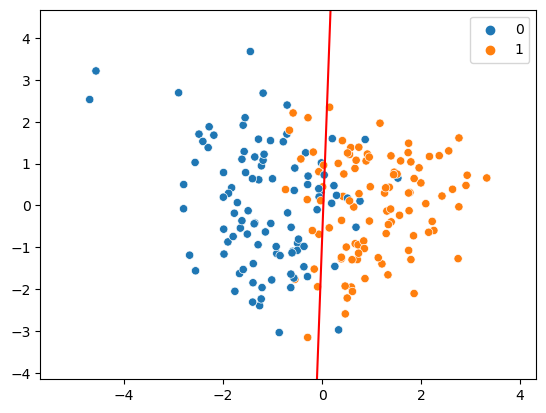

In [101]:
# Plot worst model
#First we obtain the index of the minimum accuracy score for the test set
worst_model_index = np.argmin(accuracy_scores_test)

#Then we plot the boundary function for the worst model
plot_boundary_function(X_test, y_test, thetas[worst_model_index], degree=degrees[worst_model_index])


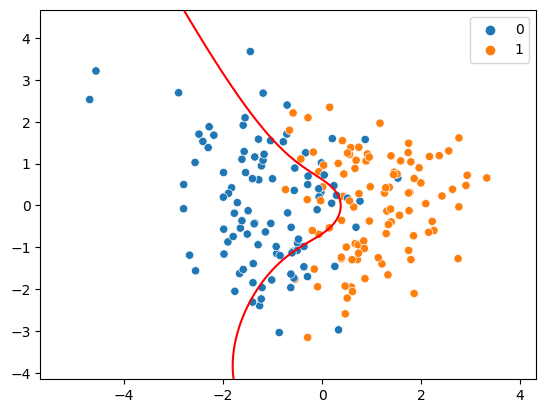

In [102]:
# Plot best model
#First we obtain the index of the maximum accuracy score for the test set
best_model_index = np.argmax(accuracy_scores_test)

#Then we plot the boundary function for the best model
plot_boundary_function(X_test, y_test, thetas[best_model_index], degree=degrees[best_model_index])


### **Question 2.3: Report *(2/10 Points)*** 



Write now your considerations. Discuss in particular:

1. Look back at the plots you have generated. What can you say about the differences between the linear, quadratic, and cubic decision boundaries? Can you say if the model is improving in performances, increasing the degree of the polynomial? Do you think you can incur in underfitting increasing more and more the degree?

2. Look at the plot of the training and test accuracy as a function of the polynomial degree. What can you say about the differences between the training and test accuracy? What can you say about the differences between the best and the worst test accuracy? In general, is it desirable to have a very complex decision boundary, i.e. a very high degree of the polynomial? Discuss and motivate your answer. 

#### **Report:**
-------------------------------------------------------

1. In this case, increasing the polynomial degree enhances the model's performance (until a certain degree) because it captures better the relationships in the data since here the boundary between classes is non-linear. Nevertheless, increasing the degree too much without taking into account the nature of the data can lead to **overfitting**. Overfitting occurs when the model becomes too complex, memorizing the training data instead of learning from it. This would lead to our model not being able to generalize to other data.


2.  From the graph we can see that the training accuracy is **higher** than the test accuracy. As mentioned in the answer 1, overfitting can be one of the causes of this phenomenon, it means that the model may too simple for the underlying patterns in the data. We can also observe that our worst test accuracy was obtained with a linear model, instead our best test accuracy was obtained with a polynomial boundary function of $d=3$, this shows us that our model performed poorly when having a low polynomial degree but it is not necessarily better with a high degree, it performed best when doing a trade-off between these two cases. In general it's not always desirable to have a very high-degree polynomial, as it is mentioned before that these can lead to overfitting.

-------------------------------------------------------

## **Question 3: Multinomial Classification *(13 Points)***

### **Question 3.1: Softmax Regression Model *(4/10 Points)***

In the multinomial classification we generally have $K>2$ classes. So the label for the $i$-th sample $X_i$ is $y_i\in\{1,...,K\}$, where $i=1,...,N$. The output class for each sample is estimated by returning a score $s_i$ for each of the K classes. This results in a vector of scores of dimension K. 
In this exercise we'll use the *Softmax Regression* model, which is the natural extension of *Logistic Regression* for the case of more than 2 classes. The score array is given by the linear model:

\begin{align*}
s_i =  X_i \theta
\end{align*}

Scores may be interpreted probabilistically, upon application of the function *softmax*. The position in the vector with the highest probability will be predicted as the output class. The probability of the class k for the $i$-th data sample is:

\begin{align*}
p_{ik} = \frac{\exp(X_i \theta_k)}{\sum_{j=1}^K(X_i \theta_j))}
\end{align*}

We will adopt the *Cross Entropy* loss and optimize the model via *Gradient Descent*. 
In the first of this exercise we have to: 
-    Write the equations of the Cross Entropy loss for the Softmax regression model;
-    Compute the equation for the gradient of the Cross Entropy loss for the model, in order to use it in the gradient descent algorithm.

#### A bit of notation

*  N: is the number of samples 
*  K: is the number of classes
*  X: is the input dataset and it has shape (N, H) where H is the number of features
*  y: is the output array with the labels; it has shape (N, 1)
*  $\theta$: is the parameter matrix of the model; it has shape (H, K)

#### **Solution:**
-------------------------------------------------------

- **Cross Entropy Loss**: 
\begin{align}
L(\theta) = -\frac{1}{N}\sum_{i=1}^{N}\sum_{k=1}^{K} y_{ik}\log(p_{ik})
\end{align}

- **Gradient of CE Loss**:

    We can take the gradient of the Cross Entropy Loss in an analogous way as we did in the first section of the homework for the log-likelihood:

    \begin{align}
    \nabla_{\theta_{k}}L(\theta) =& - \frac{1}{N} \sum_{i=1}^{N}  \nabla_{\theta_{k}} y_{ik}\log(p_{ik}) = - \frac{1}{N} \sum_{i=1}^{N} y_{ik}\nabla_{\theta_{k}}\log(p_{ik}) \nonumber\\
    =&  - \frac{1}{N} \sum_{i=1}^{N} \left(y_{ik} \frac{X_{i}e^{X_{i}\theta_{k}}}{e^{X_{i}\theta_{k}}} - \sum_{j=1}^{K}y_{ij}\frac{X_{i}e^{X_{i}\theta_{j}}}{\sum_{l=1}^{K}e^{X_{i}\theta_{l}}}\right)\nonumber\\
    =&  - \frac{1}{N} \sum_{i=1}^{N}\left(y_{ik}X_{i} - \sum_{j=1}^{K}y_{ij}X_{i}p_{ij}\right) \nonumber\\
    =& \boxed{- \frac{1}{N} \sum_{i=1}^{N} X_{i}(y_{ik}-p_{ik})} \tag{2}
    \end{align}

-------------------------------------------------------

**Do not write below this line just run it**

--------------------------------------------

### **Question 3.2: Coding *(4/10 Points)***

Now we will implement the code for the equations. Let's implement the functions:
-  softmax 
-  CELoss
-  CELoss gradient
-  gradient descent

We are using the CIFAR-10 dataset for this exercise. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. It has 50,000 training images and 10,000 test images. The dataset was established by the Canadian Institute For Advanced Research (CIFAR), and it has become a standard benchmark for machine learning algorithms, especially in the area of image classification.

In [103]:
# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
test_data = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)


Files already downloaded and verified
Files already downloaded and verified


*Hint: consider the labels as one-hot vector. This will allow matrix operations (element-wise multiplication and summation).*

In [104]:
# Convert labels to one-hot encoded format
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((len(y), num_classes))
    for i, val in enumerate(y):
        encoded[i, val] = 1
    return encoded



**Write your code below this line**

--------------------------------------------

In [105]:
def softmax(theta, X):
    """
    Function to compute associated probability for each sample and each class.

    Args:
        theta: it's the model parameter matrix. The shape is (H, K)
        X: it's the input data matrix. The shape is (N, H)

    Returns:
        softmax: it's the matrix containing probability for each sample and each class. The shape is (N, K)
    """
    y = np.dot(X, theta)
    numerator = np.exp(y)
    denominator = np.sum(numerator, axis=1, keepdims=True)

    return numerator / denominator


def CELoss(theta, X, y_onehot):
    """
    Function to compute softmax regression model and Cross Entropy loss.

    Args:
        theta: it's the model parameter matrix. The shape is (H, K)
        X: it's the input data matrix. The shape is (N, H)
        y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)

    Returns:
        loss: The scalar that is the mean error for each sample.
    """
    #First we obtain the number of samples
    n = y_onehot.shape[0]
    #Here we compute the cross entropy loss
    loss = -np.sum(y_onehot * np.log(softmax(theta, X)))/n
    #Here we return the cross entropy loss
    return loss


def CELoss_jacobian(theta, X, y_onehot):
    """
    Function to compute gradient of the cross entropy loss with respect the parameters.

    Args:
        theta: it's the model parameter matrix. The shape is (H, K)
        X: it's the input data matrix. The shape is (N, H)
        y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)

    Returns:
        jacobian: A matrix with the partial derivatives of the loss. The shape is (H, K)
    """
    #First we obtain the number of samples
    n = y_onehot.shape[0]
    #Here we compute the jacobian of the cross entropy loss
    jacobian = -np.dot(X.T, y_onehot - softmax(theta, X))/n
    #Here we return the jacobian of the cross entropy loss
    return jacobian


def gradient_descent(theta, X, y_onehot, alpha=0.01, iterations=100):
    """
    Function to compute gradient of the cross entropy loss with respect the parameters.

    Args:
        theta: it's the model parameter matrix. The shape is (H, K)
        X: it's the input data matrix. The shape is (N, H)
        y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)
        alpha: it's the learning rate, so it determines the speed of each step of the GD algorithm
        iterations: it's the total number of step the algorithm performs

    Returns:
        theta: it's the updated matrix of the parameters after all the iterations of the optimization algorithm. The shape is (H, K)
        loss_history: it's an array with the computed loss after each iteration
    """
    # We initialize an empty array to be filled with loss value after each iteration
    loss_history = np.zeros(iterations)

    # With a for loop we compute the steps of GD algorithm
    for it in range(iterations):
        # Here we compute the gradient of the loss
        jacobian = CELoss_jacobian(theta, X, y_onehot)
        # Here we update the parameters
        theta -= alpha*jacobian
        # Here we compute the loss
        loss_history[it] = CELoss(theta, X, y_onehot)
    # Here we return the updated parameters and the loss history
    return theta, loss_history



**Do not write below this line just run it**

--------------------------------------------

*Execution can take around 10 minutes*

In [106]:
# Evaluate the accuracy of the predictions
def compute_accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions


# Prediction function
def predict(theta, X):
    probabilities = softmax(theta, X)
    return np.argmax(probabilities, axis=1)


# Preprocess the data
X_train = [img.reshape(-1).numpy() for img, _ in train_data]
X_train = np.array(X_train)
y_train = [label for _, label in train_data]

X_test = [img.reshape(-1).numpy() for img, _ in test_data]
X_test = np.array(X_test)
y_test = [label for _, label in test_data]


# Add bias term to X
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

y_train_onehot = one_hot_encode(y_train)
y_test_onehot = one_hot_encode(y_test)


# Initialize theta
H, K = X_train.shape[1], 10  # number of features and number of classes
theta = np.random.randn(H, K) * 0.001


# Apply gradient descent to optimize theta
alpha = 0.01
iterations = 500
theta_optimized, loss_history = gradient_descent(
    theta, X_train, y_train_onehot, alpha, iterations
)


# Make predictions on the training and test data
train_predictions = predict(theta_optimized, X_train)
test_predictions = predict(theta_optimized, X_test)

train_accuracy = compute_accuracy(train_predictions, y_train)
test_accuracy = compute_accuracy(test_predictions, y_test)

#print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Test accuracy: 36.50%


### **Question 3.3: Histogram Features Extraction *(2/10 Points)***

In this exercise, the goal is to implement a simple image classification procedure using the CIFAR-10 dataset. Instead of using the raw pixel values or advanced deep learning techniques, you will be extracting color histogram features from the images for classification purposes.

- Extract Color Histogram Features.
Implement the extract_histogram_features function. This function should process the dataset and convert each image into a set of histograms – one for each color channel (Red, Green, Blue).
Each histogram will serve as a feature for the classifier.

- Train a Logistic Regression Classifier.
Use the scikit-learn library to initialize and train a logistic regression classifier with the extracted histogram features.

- Evaluate the Classifier.
Use the trained classifier to predict the classes of both the training and test datasets.
Calculate and print the accuracy of the classifier for both datasets to gauge its performance.

Fill in the sections of the provided code marked with "YOUR CODE HERE". Ensure that the final pipeline is complete and functional.

In [107]:
def extract_histogram_features(data, bins=30):
    """
    This function takes in a dataset and a number of "bins"
    and returns pixel histograms and the corresponding labels.

    Hint: Use the 'data' variable to access the images and their labels.

    Args:
        data: the input data
        bins: the number of bins

    Returns:
        histograms: the pixel histograms
        labels: the corresponding labels
    """
    #First we extract the images and the labels of the data
    images = np.array([img for img, _ in data])
    labels = np.array([label for _, label in data])
    
    #We initialize an empty list to be filled with the histograms
    histograms = []
    for image in images:
        #For each image we extract the color channels R, G and B
        R_channel = image[0,:,:]
        G_channel = image[1,:,:]
        B_channel = image[2,:,:]

        #Here we compute the histograms for each color channel
        R_hist, _= np.histogram(R_channel, bins=bins, range=(0, 1), density=True)
        G_hist, _= np.histogram(G_channel, bins=bins, range=(0, 1), density= True)
        B_hist, _= np.histogram(B_channel, bins=bins, range=(0, 1), density= True)
        #Here we append the histograms to the list of histograms
        histograms.append(np.concatenate([R_hist, G_hist, B_hist]))
    #Here we return the histograms and the labels
    histograms = np.array(histograms)
    return histograms, labels



**Do not write below this line just run it**

--------------------------------------------

In [108]:
max_iter = 50


In [109]:
train_features_hist, train_labels_hist = extract_histogram_features(train_data)
test_features_hist, test_labels_hist = extract_histogram_features(test_data)

# Train the classification model
clf = LogisticRegression(max_iter=max_iter)
clf.fit(train_features_hist, train_labels_hist)

# Performance evaluation
train_predictions_hist = clf.predict(train_features_hist)
test_predictions_hist = clf.predict(test_features_hist)

train_acc_hist = compute_accuracy(
    train_labels_hist, train_predictions_hist
)  # compute_accuracy
test_acc_hist = compute_accuracy(test_labels_hist, test_predictions_hist)

print(f"Training accuracy: {train_acc_hist * 100:.2f}%")
print(f"Test accuracy: {test_acc_hist * 100:.2f}%")


Training accuracy: 27.46%
Test accuracy: 27.47%


/Users/miguelangel/anaconda3/envs/fds/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.3.2 AlexNet features extractions

Now, let's try extracting features using AlexNet, which is pretrained on ImageNet. For your convenience, we're providing the extracted features directly through this Google Drive link: 
https://drive.google.com/drive/folders/12QoP_8V1hSL2bRZXvZ2sbHm8MUOCbbaP?usp=sharing. 

You will need to retrain the logistic regression on these new features. After that, there will be a section on questions regarding the differing performances.


**Do not write below this line just run it**

--------------------------------------------

In [110]:
# Load features and labels from disk
features_alex_net = "AlexNet"
train_features_alexnet = np.load(os.path.join(features_alex_net, "train_features.npy"))
train_labels_alexnet = np.load(os.path.join(features_alex_net, "train_labels.npy"))
test_features_alexnet = np.load(os.path.join(features_alex_net, "test_features.npy"))
test_labels_alexnet = np.load(os.path.join(features_alex_net, "test_labels.npy"))

# Train logistic regression
clf = LogisticRegression(max_iter=max_iter)
clf.fit(train_features_alexnet, train_labels_alexnet)

# Performance evaluation
train_predictions_alexnet = clf.predict(train_features_alexnet)
train_acc_alexnet = compute_accuracy(train_labels_alexnet, train_predictions_alexnet)

test_predictions_alexnet = clf.predict(test_features_alexnet)
test_acc_alexnet = compute_accuracy(test_labels_alexnet, test_predictions_alexnet)

print(f"Training accuracy: {train_acc_alexnet * 100:.2f}%")
print(f"Test accuracy: {test_acc_alexnet * 100:.2f}%")


/Users/miguelangel/anaconda3/envs/fds/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 89.83%
Test accuracy: 84.19%


### 3.3.3 Performance Evaluation

Now, we aim to compare the performances obtained. 
Please note that this section is purely theoretical, you should execute the code provided below and then answer the questions that will be presented at the end of this section.

**Do not write below this line just run it**

--------------------------------------------

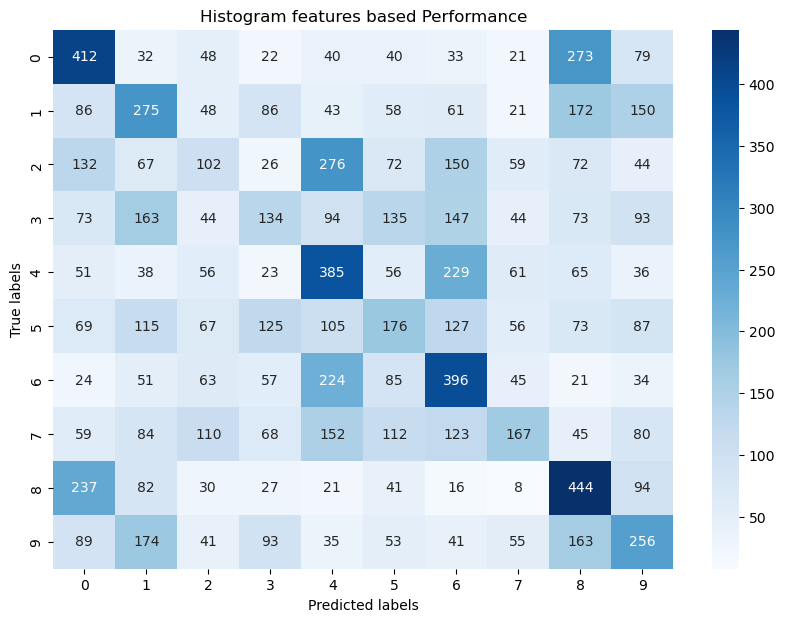

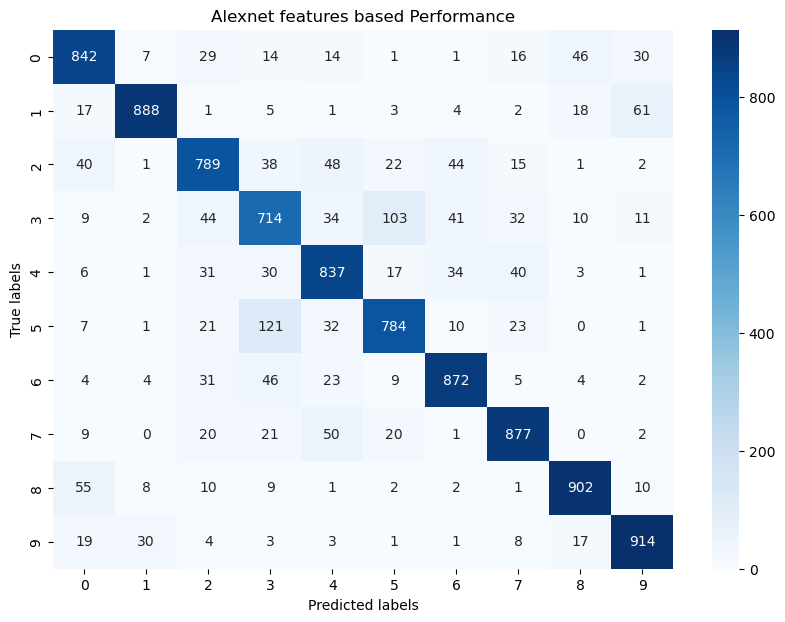

In [111]:
# Compute diffusion matrix for Histogram Features example
conf_matrix_hist = confusion_matrix(test_labels_hist, test_predictions_hist)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_hist, annot=True, fmt="g", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Histogram features based Performance")
plt.show()

# Compute diffusion matrix for AlexNet Features example
conf_matrix_alexnet = confusion_matrix(test_labels_alexnet, test_predictions_alexnet)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_alexnet, annot=True, fmt="g", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Alexnet features based Performance")
plt.show()



**Answer the following questions**

--------------------------------------------

1. Provide a comment on the confusion matrix and try to give an explanation for why this happens?

2. Why is the accuracy higher when using raw pixels as input compared to when we use features extracted from the histogram?


#### **Report:**

--------------------------------------------


1.  As we can see the performance using AlexNet is way better than our approach using the histogram features based algorithm. AlexNet is clearlly classifing the majority of the images with their correct labels, with few images being incorrectly classified in comparison with the histogram approach. This is probably due to the fact that when comparing images with similar colours but different composition the histograms might not be able to capture totally the diferences between images thus incorrectly classifing the data points.


2. Histogram features are a way to represent images by summarizing the distribution of pixel intensities. However, this compression can lead to loss of information, particularly when the intensity distribution alone is not enough to distinguish between different categories. So we are losing information that then when passed as input is going to be more difficult to use to correctly classify the images. On the other side, using raw pixels allows to retain the relationships between neighbour pixels, that way the model can capture detailed patterns and textures in the images.

--------------------------------------------

## **Question 4 (BONUS): Trasfer Learning on CIFAR-10 _(5 points)_**

**Transfer Learning (TL)** is a machine learning technique that consists in reusing a pre-trained model and its weights to perform a task similar to the one the model has been trained on. Pre-trained models are usually trained using large amounts of data and are really useful if you have just a small dataset to learn from.

In this bonus question you are going to leverage a pre-trained DNN, [**AlexNet**](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf), trained on the IMAGENET dataset, in order to train two classification models on a different, smaller, dataset (CIFAR-10 in this case).

The dataset your are going to use is made of 50000 feature embeddings with 1024 dimensions obtained by encoding the images in CIFAR-10 with the pre-trained AlexNet. This means that your classifier is going to leverage the representation power of a relatively large DNN without the actual need to train in from scratch, which would require high GPU power and many hours/days of training.

For the most curious among you: at the end of the exercise you will find the actual code that we used to encode the CIFAR-10 dataset with AlexNet using the [**PyTorch**](https://pytorch.org/) framework. In case you wanted to run it, we suggest to either use Google Colab with the runtime set to GPU (Runtime -> Change runtime type -> GPU) or a PC/laptop with a relative capable GPU (minimum 4GB of VRAM).

**Do not write below this line, just run it**

--------------------------------------------

In [112]:
# import libraries and set seed
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
np.random.seed(123)


In [113]:
# load the train and test datasets
X_train = np.load("./data/processed_data/X_train.npy")
y_train = np.load("./data/processed_data/y_train.npy")
y_onehot_train = np.load("./data/processed_data/y_onehot_train.npy")

X_test = np.load("./data/processed_data/X_test.npy")
y_test = np.load("./data/processed_data/y_test.npy")


In [114]:
# Shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("y_onehot_train shape:", y_onehot_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (50000, 1024)
y_train shape: (50000,)
y_onehot_train shape: (50000, 10)
X_test shape: (10000, 1024)
y_test shape: (10000,)


### **Question 4.1: Train a KNN Classifier on CIFAR-10 _(2/5 points)_**

Your goal is to train a KNN Classification model using the pre-processed and encoded CIFAR-10 dataset (given by us).

The encoded dataset is made of 50000 feature embeddings with 1024 dimensions. The labels are encoded as integers in the range [0,9], they will serve as the target of your classifier.

KNN is a simple and intuitive classification algorithm that works by assigning a label to a new sample based on the labels of the K nearest samples in the training set. The label is the one that appears the most among the K nearest samples.


**HINTS:** 
* You will have to train the KNN classifier on the training set by trying different values of K. At the end you will have to report the accuracy of your model on the test set for the best value of K.
* You **must** use sklearn.neighbors.KNeighborsClassifier to train your model. You can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).



In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [116]:
# subsampling data
num_training = 10000
mask = list(range(num_training))
X_train_sub = X_train[mask]
y_train_sub = np.array(y_train)[mask]


In [117]:
k_range = range(5, 11)
scores = {}
scores_list = []


**Write your code below this line**

--------------------------------------------

In [118]:
#Here we use the KNeighborsClassifier from sklearn to train the model for different values of k
for k in tqdm(k_range):
    #Here we initialize the model with the k value
    knn = KNeighborsClassifier(n_neighbors=k)
    #Here we fit the model with the training data
    knn.fit(X_train_sub, y_train_sub)
    #Here we obtain the predictions for the test data
    y_pred = knn.predict(X_test)
    #Here we compute the accuracy score for the test data
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    #Here we append the accuracy score to the list of scores
    scores_list.append(metrics.accuracy_score(y_test, y_pred))


100%|██████████| 6/6 [00:06<00:00,  1.08s/it]


**Do not write below this line, just run it**

--------------------------------------------

Text(0, 0.5, 'Testing Accuracy')

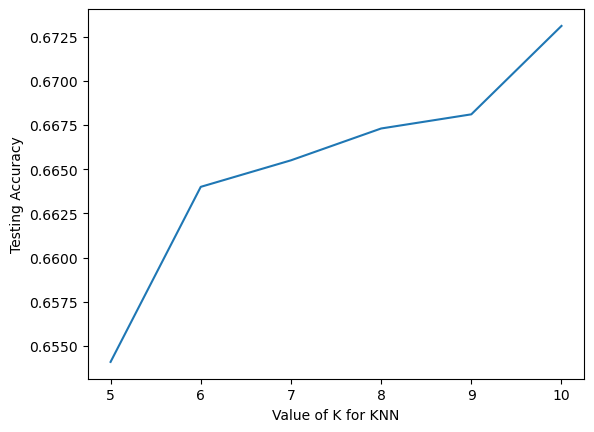

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


**Do not write below this line, just run it**

--------------------------------------------

In [154]:
# now pick the best k and train on the whole training set
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [155]:
# print the accuracy for the test set
print(metrics.accuracy_score(y_test, y_pred))
# print the accuracy for the train set
print(metrics.accuracy_score(y_train, knn.predict(X_train)))


0.7363
0.79738


### **Question 4.2: Train a Softmax Classifier on CIFAR-10 _(2/5 points)_**

Your goal is to train a Softmax Regression Model using the pre-processed and encoded CIFAR-10 dataset (given by us) and the code written by you in Question 3.2.

Here you have to write the code to train your Softmax Regression Model.  
Your function has to return the inital theta, the learned theta, and the loss history.  
You can evaluate its performance with the code below.

**HINT:** Experiment with different alpha's with a small number of iterations to keep the training time low. Once you find the best alpha you can train your model for as long as needed.

**Write your code below this line**

--------------------------------------------

In [122]:
def fit_softmax_classifier(X_train, y_train_onehot, alpha, n_iter):
    """
    This uses the gradient descent algorithm to fit a softmax classifier.

    Args:
        X_train: the training data
        y_train_onehot: the training labels in one-hot encoded format
        alpha: the learning rate
        n_iter: the number of iterations

    Returns:
        theta0: the initial model parameter matrix
        theta_final: the final model parameter matrix
        log_l_history: the values of the log likelihood during the process
    """
    #Here we initialize the model parameter matrix
    theta0 = np.random.rand(X_train.shape[1], y_train_onehot.shape[1])
    #Here we run the gradient descent algorithm
    theta_final, log_l_history = gradient_descent(theta0, X_train, y_train_onehot, alpha, n_iter)
    #Here we return the initial model parameter matrix, the final model parameter matrix and the log likelihood history
    return theta0, theta_final, log_l_history


**Do not write below this line, just run it**

--------------------------------------------

In [149]:
theta0, theta_final, log_l_history = fit_softmax_classifier(
    X_train, y_onehot_train, alpha=1e4, n_iter=1000
)


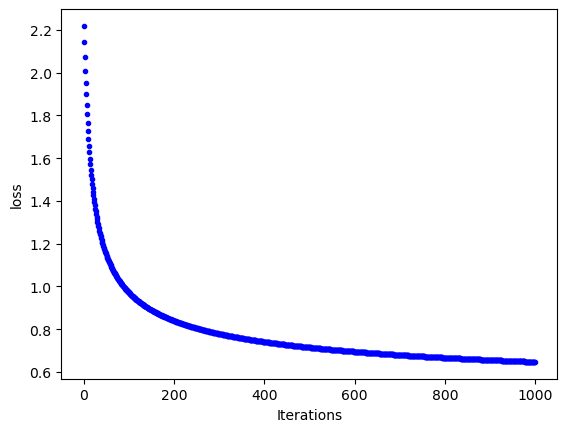

In [150]:
fig, ax = plt.subplots(num=2)

ax.set_ylabel("loss")
ax.set_xlabel("Iterations")
_ = ax.plot(range(len(log_l_history)), log_l_history, "b.")


In [151]:
def compute_accuracy(theta, X, y):
    """
    Function to compute accuracy metrics of the softmax regression model.

    Input:
    theta: it's the final parameter matrix. The one we learned after all the iterations of the GD algorithm. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y: it's the label array. The shape is (N, 1)

    Output:
    accuracy: Score of the accuracy.
    """
    #Here we compute the predictions
    y_pred = predict(theta, X)
    #Here we compute the accuracy score
    accuracy = np.mean(y_pred == y)
    #Here we return the accuracy score
    return accuracy


**Do not write below this line, just run it**

--------------------------------------------

In [152]:
theta0 = np.random.rand(X_train.shape[1], 10)

acc_rand_train = compute_accuracy(theta0, X_train, y_train)
acc_train = compute_accuracy(theta_final, X_train, y_train)

acc_rand_test = compute_accuracy(theta0, X_test, y_test)
acc_test = compute_accuracy(theta_final, X_test, y_test)

print(f"Accuracy with random parameters on train set: {acc_rand_train}")
print(f"Accuracy with learned parameters on train set: {acc_train}")
print(f"Accuracy with random parameters on test set: {acc_rand_test}")
print(f"Accuracy with learned parameters on test set: {acc_test}")


Accuracy with random parameters on train set: 0.12416
Accuracy with learned parameters on train set: 0.7839
Accuracy with random parameters on test set: 0.13
Accuracy with learned parameters on test set: 0.7631


### **Question 4.3: Report _(1/5 points)_**

Write a report comparing the results obtained with the two different classifiers.

Try to answer the following questions:

- Which classifier performs better? Why? Is there a trade-off between the two in terms of perfomance/computation time?

- Do the classifiers obtain the same accuracy on train and test sets? If not, try to give an explanation.

- What values of alpha are best to train the two classifiers and what is the optimal number of iterations? 

#### **Report:**
--------------------------------------------

##### **Performance of the Classifiers**

Since the test accuracy for the Softmax classifier was $\sim 0.76$ and the test accuracy for the KNN classifier was $\sim 0.73$, we can say (with reservations) that the Softmax classifier performed a little better. Since the Softmax classifier is a parametric model that learns a set of weights for each class. It is capable of capturing complex relationships in the data and can adapt its parameters during training to optimize for the given task. On the other hand, the KNN classifier is a non-parametric model that memorizes the entire training dataset. While it can capture local patterns in the data, it might struggle with more complex relationships.

Training the Softmax classifier, was computationally expensive and we can imagine it would be worse with a large dataset. However, once trained, making predictions on new data should be fast. On the other hand, the prediction time for KNN can be computationally expensive, especially as the size of the training dataset grows, because it requires calculating distances to all training samples. Therefore there is a trade-off between the two in terms of computation time since choosing between the two of them depends if we value performance more than computation time or viceversa.

##### **Accuracy of the Classifiers**

We can make a table with the accuracy for both classifiers:

| Accuracy | Softmax | KNN     |
|----------|---------|---------|
| Test     | 0.7631  | 0.7363  |
| Train    | 0.7839  | 0.79739 |



Even though the accuracy values are very similar, they are not the same. The Softmax classifier appears to be providing a good balance between train and test accuracy, indicating better generalization to unseen data. On the other hand, the KNN classifier, while achieving a higher accuracy on the training set, seems to suffer from overfitting, leading to a slightly lower performance on the test set.

##### **Learning Rate and Number of Iterations**

* The KNN classifier doesn't have an $\alpha$ parameter since it doesn't perform gradient descent optimization and doesn't have a $N$ parameter since training in KNN involves storing the entire dataset in memory. Nevertheless it has $K$ the number of neighbors and we've found previously that the optimal value for this parameter is $K=10$.

* For the Softmax Classifier, in order to find optimal $\alpha$ and $N$ we would have to perform hyperparameter tuning for finding these values. In order to solve this question we could defina a function to perform a simple grid search:

In [156]:
def grid_search(X_train, y_train_onehot, X_test, y_test_onehot, alpha_values, n_iter_values):
    """
    Function to perform a grid search to find the best hyperparameters.

    Args:
        X_train: the training data
        y_train_onehot: the training labels in one-hot encoded format
        X_test: the test data
        y_test_onehot: the test labels in one-hot encoded format
        alpha_values: the values of the learning rate to search
        n_iter_values: the values of the number of iterations to search
    """
    
    #Here we initialize the best accuracy, the best alpha, the best number of iterations and the best theta
    best_accuracy = 0
    best_alpha = None
    best_n_iter = None
    best_theta = None

    #Here we iterate over the values of the learning rate and the number of iterations
    for alpha in tqdm(alpha_values):
        for n_iter in n_iter_values:
            # Train softmax classifier
            theta0, theta_final, _ = fit_softmax_classifier(X_train, y_train_onehot, alpha, n_iter)

            #Evaluate on test set
            accuracy = compute_accuracy(theta_final, X_test, y_test_onehot)

            # Update best hyperparameters if needed
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_alpha = alpha
                best_n_iter = n_iter
                best_theta = theta_final

    return best_alpha, best_n_iter, best_theta


We can perform it:

In [160]:
# Define the range of hyperparameter values to search
alpha_values = [1e3, 1e4, 1e5]
n_iter_values = [100, 500, 1000]


# Perform grid search
best_alpha, best_n_iter, best_theta = grid_search(X_train, y_onehot_train, X_test, y_test, alpha_values, n_iter_values)

print("Best Learning Rate:", best_alpha)
print("Best Number of Iterations:", best_n_iter)


100%|██████████| 3/3 [13:00<00:00, 260.15s/it]

Best Learning Rate: 10000.0
Best Number of Iterations: 1000


Because of computational issues, it is clear we can't perform this analysis for a big list of $\alpha$'s and $N$'s. Nevertheless as we can see, for the ones we tested we found that the best values for our Softmax classifier are: $\alpha=1\times e^{4}$ and $N=1000$ (we had already trained our model with this parameters).

### **Code used to create the dataset _(no points)_**

This part of the homework will not give you any points and it is not needed to complete the assignment, so please don't ask for help before the deadline if you are not able to run it.

Run only if you have the following minimum requirements:
- Google Colab with GPU runtime active (Runtime -> Change runtime type -> GPU) or a PC/laptop with a relatively capable GPU (minimum 4GB of VRAM)
- High speed connection and minimum 4GB of free storage
    - the download of the dataset and the weights of the pre-trained AlexNet have large sizes!

In [ ]:
# import useful libraries and functions
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np

from sklearn.preprocessing import normalize
from tqdm import tqdm

torch.manual_seed(123)
np.random.seed(123)


In [ ]:
# image transform for CIFAR-10 dataset
transform = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

# download CIFAR-10 dataset for train and test
train_data = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
test_data = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)

# download pre-trained AlexNet
pretrained_net = torch.hub.load(
    "pytorch/vision:v0.10.0", "alexnet", weights="AlexNet_Weights.DEFAULT"
)
classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

# define the device you will use for training (cpu or cuda)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Let's take a look at it!

The network is composed by a backbone with multiple Conv2d, ReLU and MaxPool2d layers, by an average pooling layer, and by a classifier.

We are going to use just the backbone of the pre-trained AlexNet (the layers included into *(features)*) and we will define a new classifier. We will train everything together on the CIFAR-10 dataset and we will leverage the pre-trained weights of the backbone to obtain high classification accuracy with just a few epochs of training. This is the power of Transfer Learning!

In [ ]:
pretrained_net


In [ ]:
# create train and test dataloaders
trainloader = torch.utils.data.DataLoader(
    train_data, batch_size=256, shuffle=True, num_workers=2
)
testloader = torch.utils.data.DataLoader(
    test_data, batch_size=256, shuffle=True, num_workers=2
)


In [ ]:
# define the encoder network to obtain image embeddings
encoder = pretrained_net.features.to(device).eval()
encoder[12] = nn.MaxPool2d(kernel_size=9, stride=4)
encoder


In [ ]:
def create_dataset(loader, feat_size, num_classes):
    X = np.empty((0, feat_size))
    y_onehot = np.empty((0, num_classes))

    for i, data in tqdm(enumerate(loader), total=len(loader)):
        images, labels = data[0].to(device), data[1].to(device)
        emb = encoder(images)
        emb = torch.flatten(emb, 1).detach().cpu().numpy()
        X = np.concatenate((X, emb))
        y_temp = nn.functional.one_hot(labels, 10).detach().cpu().numpy()
        y_onehot = np.concatenate((y_onehot, y_temp))

    X = normalize(X, axis=1, norm="l1")
    y = np.argmax(y_onehot, axis=1)
    return X, y, y_onehot


In [ ]:
print("Preparing train data...")
X_train, y_train, y_onehot_train = create_dataset(trainloader, 1024, 10)
print("Preparing test data...")
X_test, y_test, _ = create_dataset(testloader, 1024, 10)


In [ ]:
if not os.path.exists("./data/processed_data"):
    os.makedirs("./data/processed_data")

np.save("./data/processed_data/X_train.npy", X_train)
np.save("./data/processed_data/y_train.npy", y_train)
np.save("./data/processed_data/y_onehot_train.npy", y_onehot_train)

np.save("./data/processed_data/X_test.npy", X_test)
np.save("./data/processed_data/y_test.npy", y_test)
